# Summary

Base model's ROC-AUC is 86.47%, while Lale's ROC-AUC is 84.43%. Lale did not perform better than base Random Forest.

[Iale](https://lale.readthedocs.io/en/latest/index.html) is an AutoML tool developed by IBM


In [1]:
import pandas as pd
# import preprocessed data
X_train = pd.read_csv('/Users/chiaralu/Desktop/Courses/INSY 695/Group Project/hotel_cancellation_ML2/datasets/X_train.csv')
y_train = pd.read_csv('/Users/chiaralu/Desktop/Courses/INSY 695/Group Project/hotel_cancellation_ML2/datasets/y_train.csv')
X_test = pd.read_csv('/Users/chiaralu/Desktop/Courses/INSY 695/Group Project/hotel_cancellation_ML2/datasets/X_test.csv')
y_test = pd.read_csv('/Users/chiaralu/Desktop/Courses/INSY 695/Group Project/hotel_cancellation_ML2/datasets/y_test.csv')
X_val = pd.read_csv('/Users/chiaralu/Desktop/Courses/INSY 695/Group Project/hotel_cancellation_ML2/datasets/X_val.csv')
y_val = pd.read_csv('/Users/chiaralu/Desktop/Courses/INSY 695/Group Project/hotel_cancellation_ML2/datasets/y_val.csv')

In [2]:
pip install lale

DEPRECATION: Loading egg at /Applications/anaconda3/lib/python3.11/site-packages/autofolio-2.1.2-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
Note: you may need to restart the kernel to use updated packages.


In [3]:
import lale.datasets.openml
import lale.helpers
from lale.lib.lale import AutoPipeline

In [5]:
# Initiate autopipeline
trainable = AutoPipeline(prediction_type='classification', scoring = 'roc_auc', 
                         max_opt_time=200, verbose = True, max_evals = 5)
trained = trainable.fit(X_train, y_train)
predicted = trained.predict(X_test)


Text(0.5, 1.0, 'ROC-AUC')

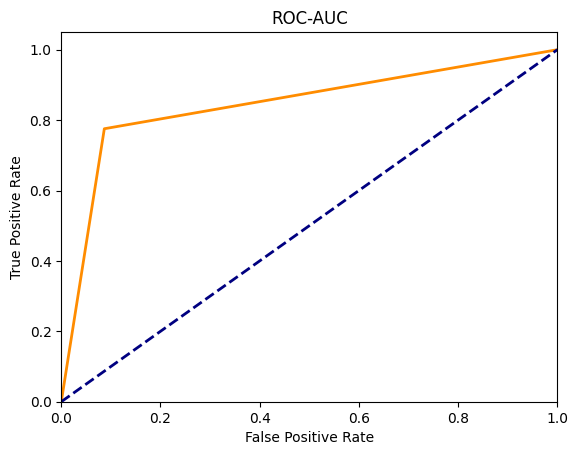

In [6]:
from sklearn.metrics import auc, roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, predicted)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC')

In [7]:
from sklearn.metrics import roc_auc_score
auc_roc = roc_auc_score(y_test, predicted)

print("Lale AutoML AUC-ROC Score:", auc_roc)


Lale AutoML AUC-ROC Score: 0.8443541771030718


In [10]:
trained.summary()


,loss,time,log_loss,status,tid
name,,,,,
gbt_num,-0.936489,1.500240,0.300084,ok,NaN
gbt_all,-0.936149,2.452987,0.300588,ok,NaN
p1,-0.675386,0.826335,0.602362,ok,1.0
dummy,-0.500000,0.011529,0.661006,ok,NaN
p0,NaN,NaN,NaN,fail,0.0
